In [190]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [192]:
import warnings
warnings.filterwarnings('ignore')

In [194]:
import pandas as pd
df = pd.read_csv('titanic.csv')

In [196]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [198]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [200]:
df = df.drop('PassengerId', axis =1)
df = df.drop('Name', axis =1)
df = df.drop('Ticket', axis =1)
df = df.drop('Cabin', axis =1)

In [202]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [204]:
df.shape

(418, 8)

In [206]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [208]:
df.duplicated().sum()

38

In [210]:
df.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      417 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.3+ KB


In [214]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [216]:
def classify_features(df):
    categorical = []
    non_categorical = []
    discrete = []
    continuous = []

    for col in df.columns:
        if df[col].dtype == 'object':
            categorical.append(col)
        else:
            non_categorical.append(col)
            # Discrete: numerical but integer values
            if len(df[col].unique()) < 15:   # threshold; you can adjust it
                discrete.append(col)
            else:
                continuous.append(col)
    
    return categorical, non_categorical, discrete, continuous


In [218]:
categorical, non_categorical, discrete, continuous = classify_features(df)
print("Categorical features:", categorical)
print("Non-categorical features:", non_categorical)
print("Discrete features:", discrete)
print("Continuous features:", continuous)


Categorical features: ['Sex', 'Embarked']
Non-categorical features: ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Discrete features: ['Survived', 'Pclass', 'SibSp', 'Parch']
Continuous features: ['Age', 'Fare']


In [220]:
print(df.isnull().sum())


Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64


In [222]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [224]:
# Encoding 'Sex' (male=0, female=1)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Encoding 'Embarked' (S=0, C=1, Q=2)
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [226]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,2
1,1,3,1,47.0,1,0,7.0000,0
2,0,2,0,62.0,0,0,9.6875,2
3,0,3,0,27.0,0,0,8.6625,0
4,1,3,1,22.0,1,1,12.2875,0


In [228]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Columns to scale
cols_to_scale = ['Age', 'Fare']

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


In [230]:
X = df.drop('Survived', axis=1)  
y = df['Survived']               


In [232]:
for i in categorical:
    print(i)
    print(df[i].unique())
    print()

Sex
[0 1]

Embarked
[2 0 1]



In [234]:
for i in categorical:
    print(i)
    print(df[i].value_counts())
    print()

Sex
Sex
0    266
1    152
Name: count, dtype: int64

Embarked
Embarked
0    270
1    102
2     46
Name: count, dtype: int64



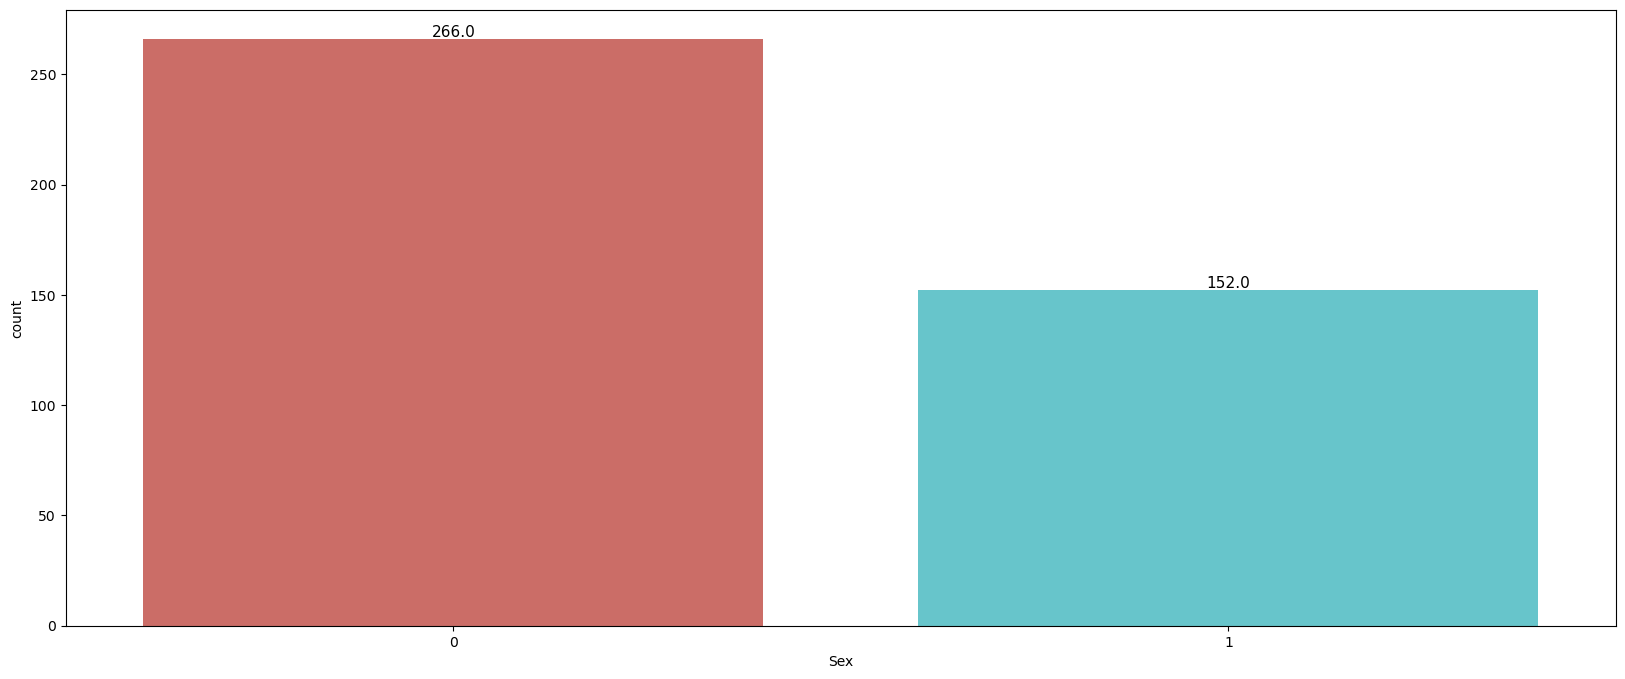

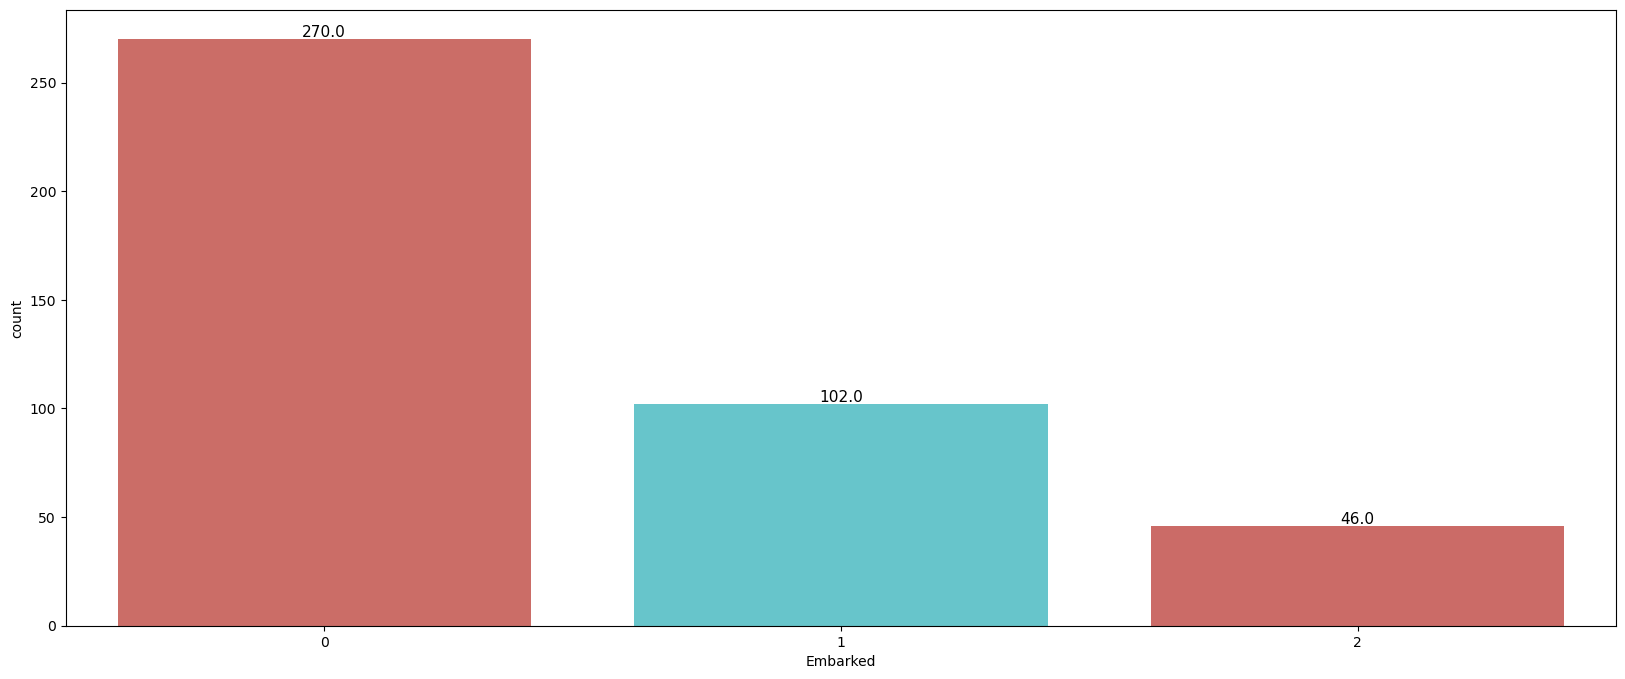

In [236]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in categorical:
    plt.figure(figsize=(20, 8))
    ax = sns.countplot(x=i, data=df, hue=i, palette='hls', legend=False)  # <-- Updated here

    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.show()


In [237]:
import plotly.express as px

for i in categorical:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

In [238]:
for i in discrete:
    print(i)
    print(df[i].unique())
    print()

Survived
[0 1]

Pclass
[3 2 1]

SibSp
[0 1 2 3 4 5 8]

Parch
[0 1 3 2 4 6 5 9]



In [240]:
for i in discrete:
    print(i)
    print(df[i].value_counts())
    print()

Survived
Survived
0    266
1    152
Name: count, dtype: int64

Pclass
Pclass
3    218
1    107
2     93
Name: count, dtype: int64

SibSp
SibSp
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64

Parch
Parch
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: count, dtype: int64



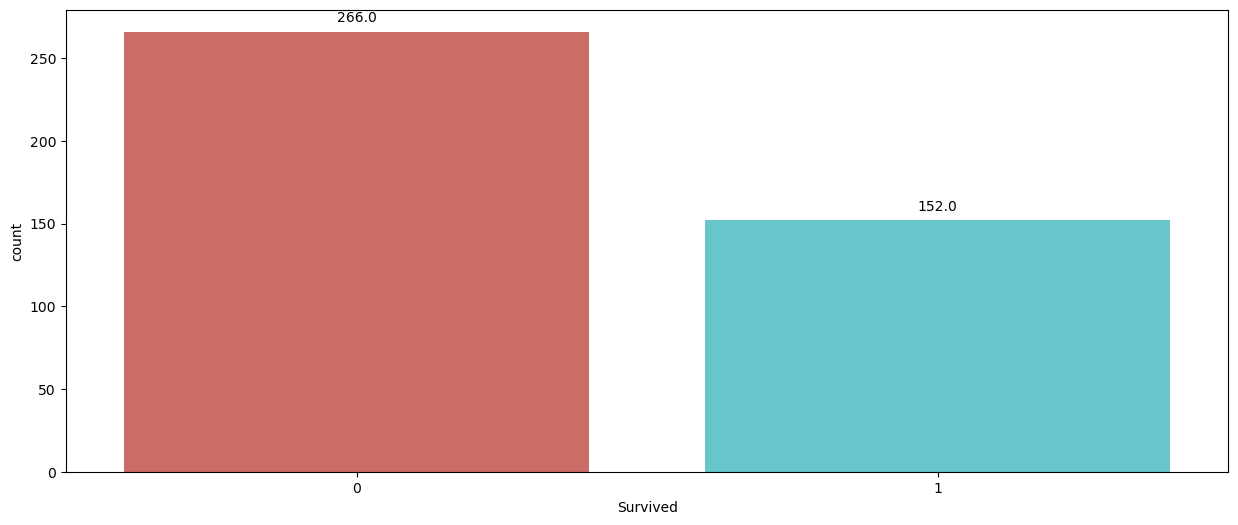

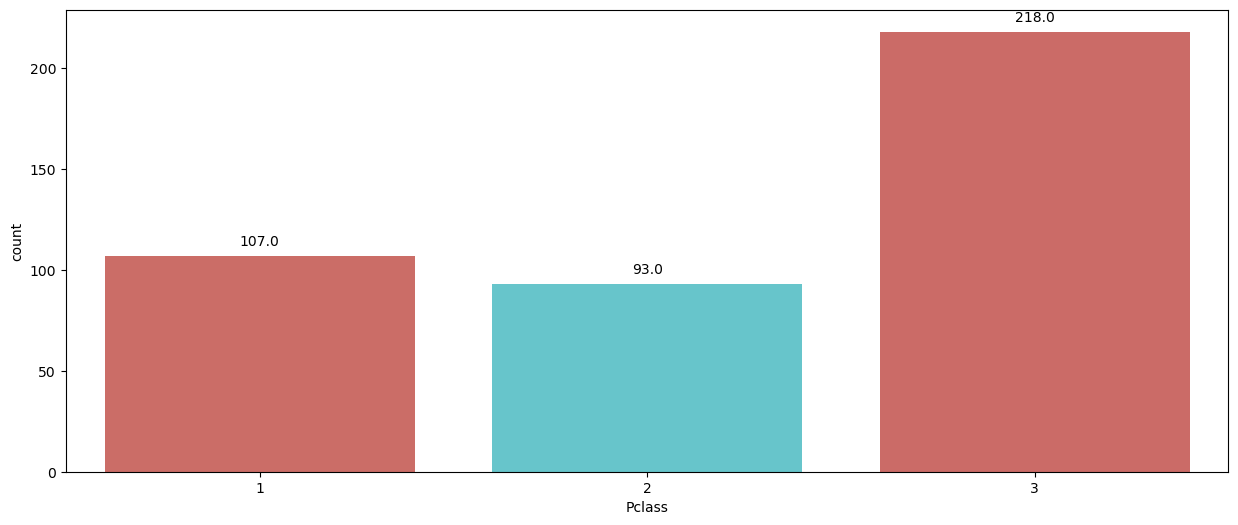

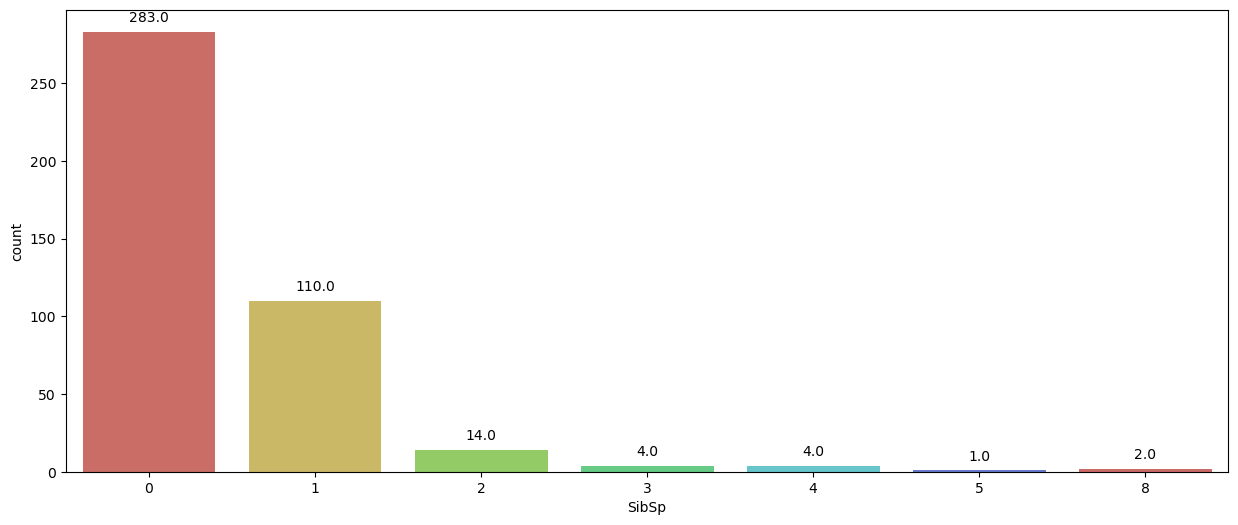

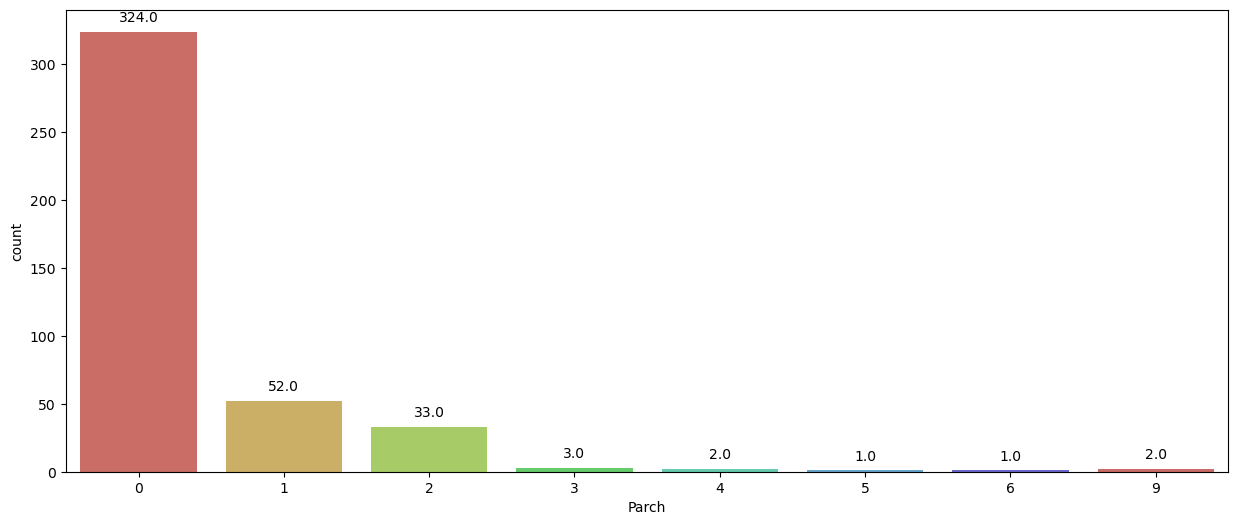

In [244]:
for i in discrete:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, hue=i, palette='hls', legend=False)  # ✅ Fixed

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),  
                    textcoords='offset points',  
                    ha='center', va='center')  
    
    plt.show()


In [245]:
for i in discrete:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

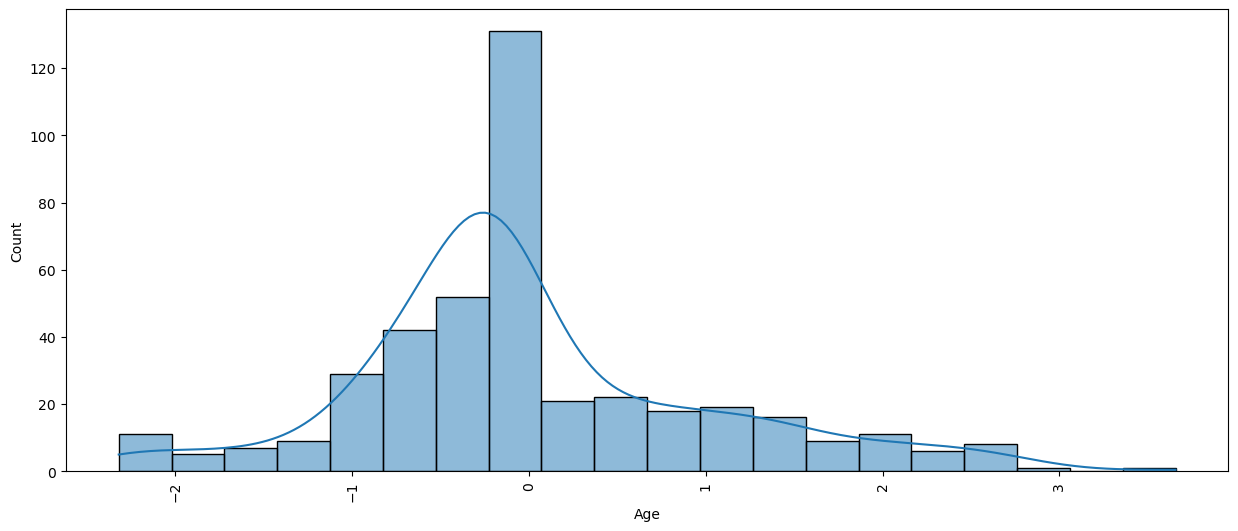

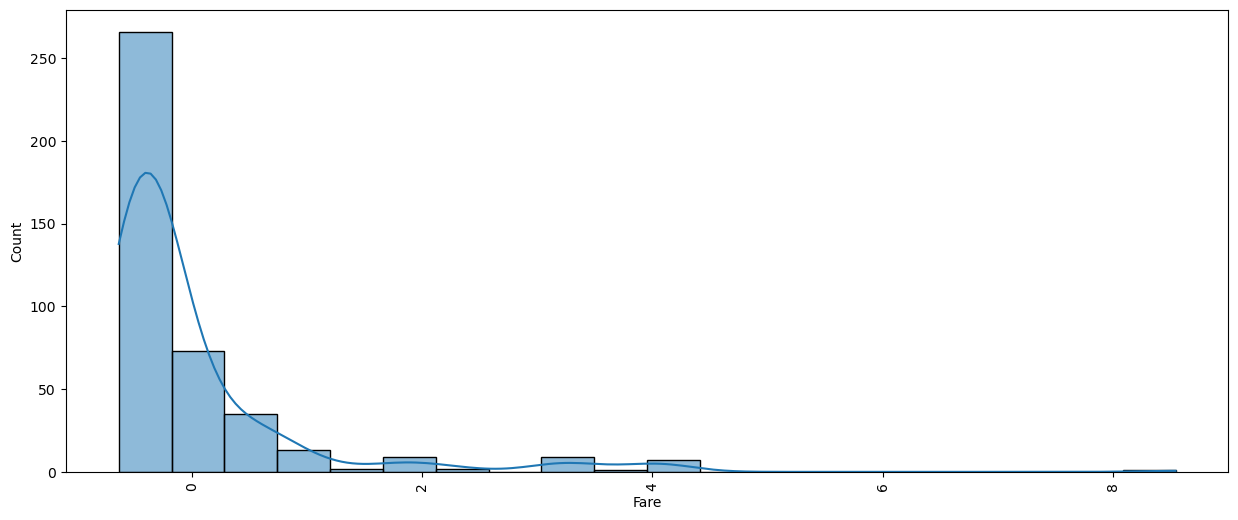

In [246]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], bins=20, kde=True)  # Removed the 'palette' argument
    plt.xticks(rotation=90)
    plt.show()


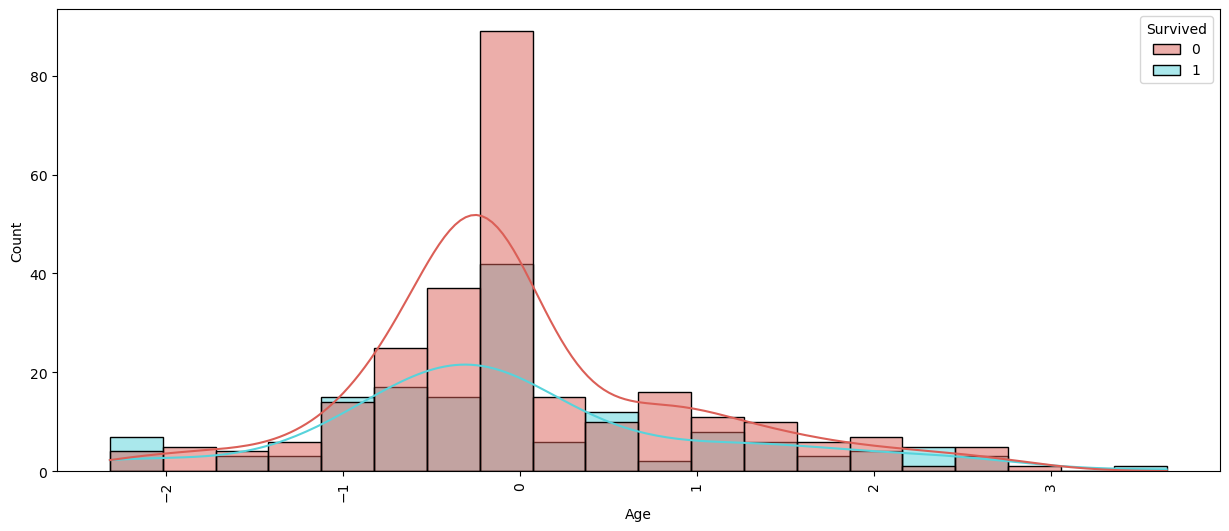

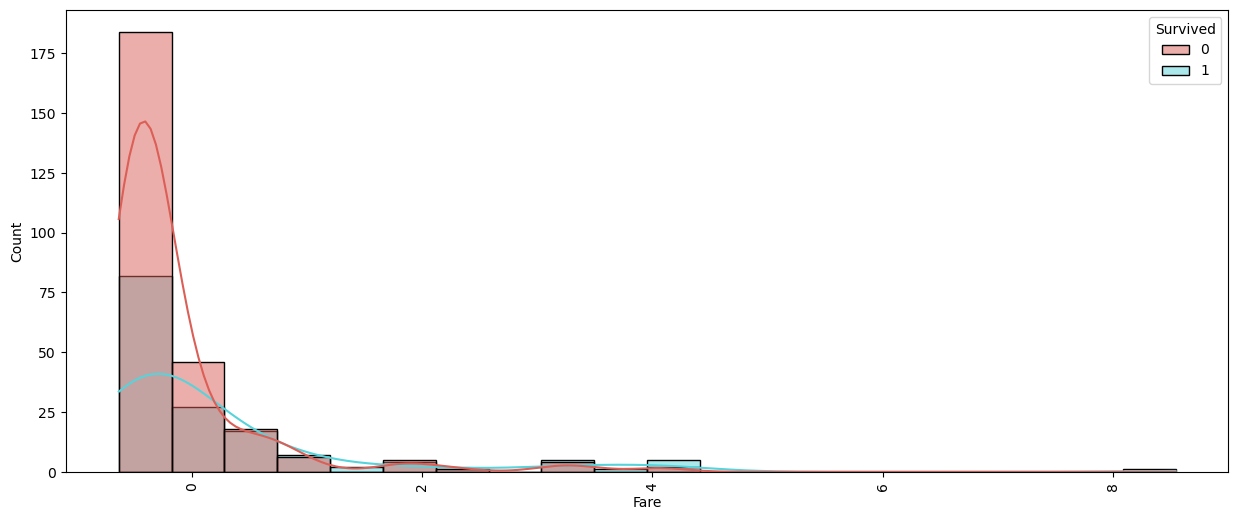

In [247]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.histplot(data=df, x=i, bins=20, kde=True, hue='Survived', palette='hls')
    plt.xticks(rotation=90)
    plt.show()


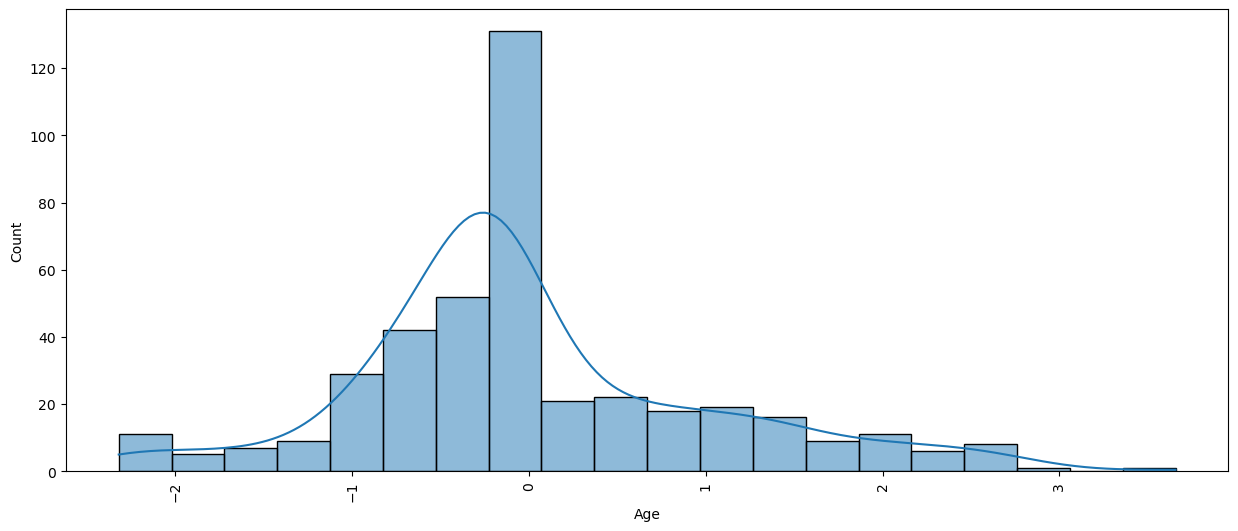

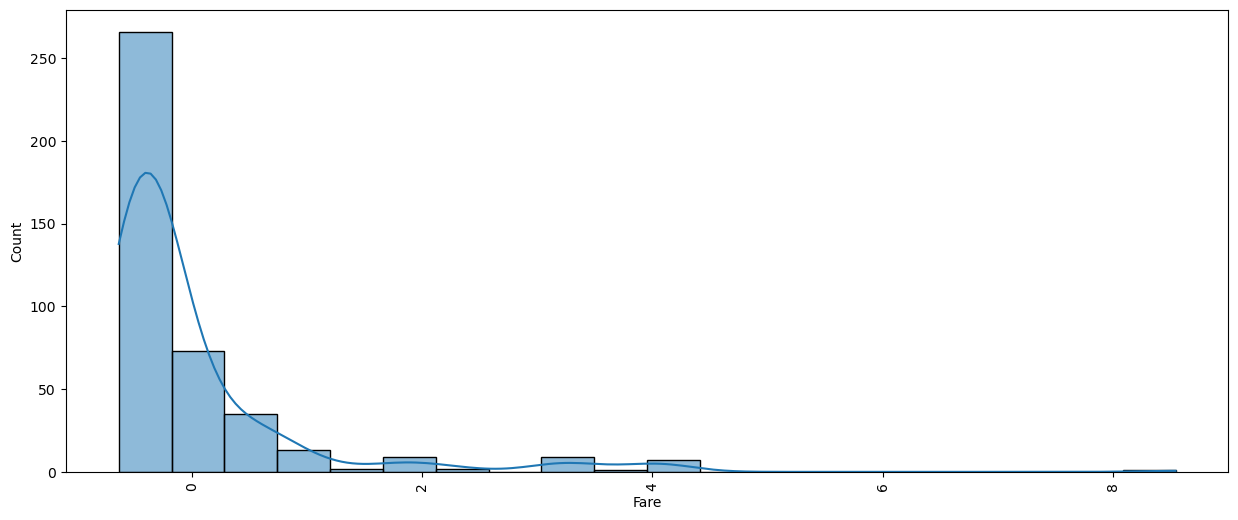

In [248]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], bins=20, kde=True)  # Corrected to use histplot
    plt.xticks(rotation=90)
    plt.show()


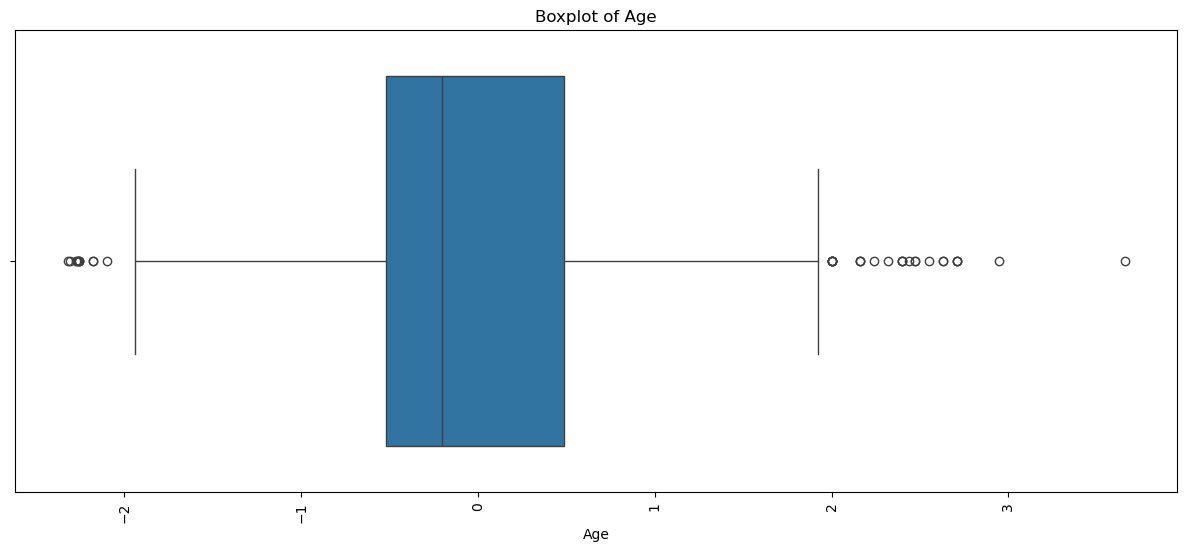

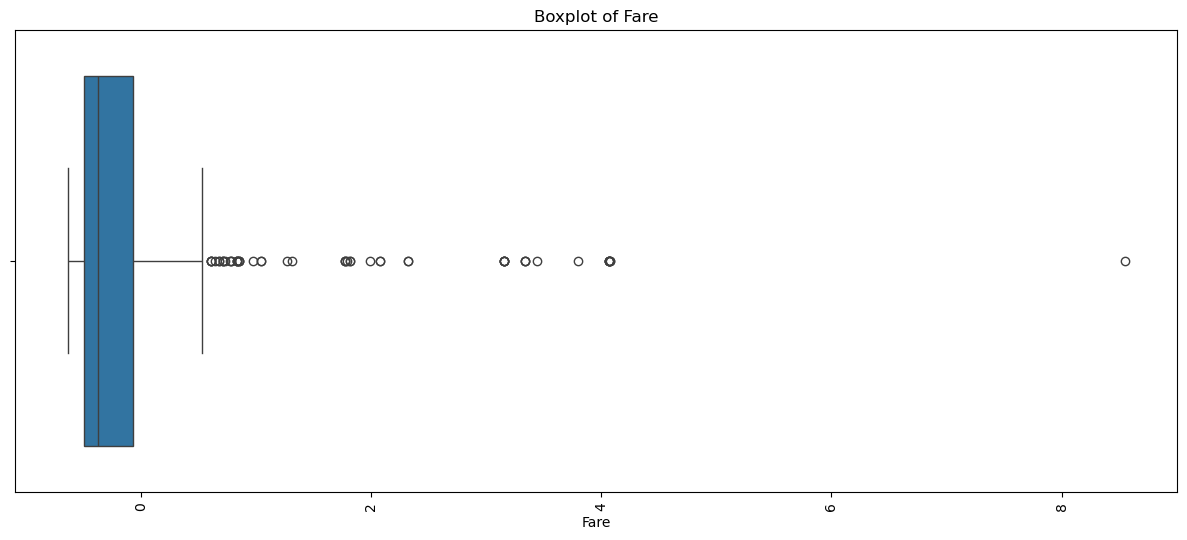

In [250]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=i, data=df)  # No palette argument
    plt.xticks(rotation=90)
    plt.title(f"Boxplot of {i}")
    plt.show()


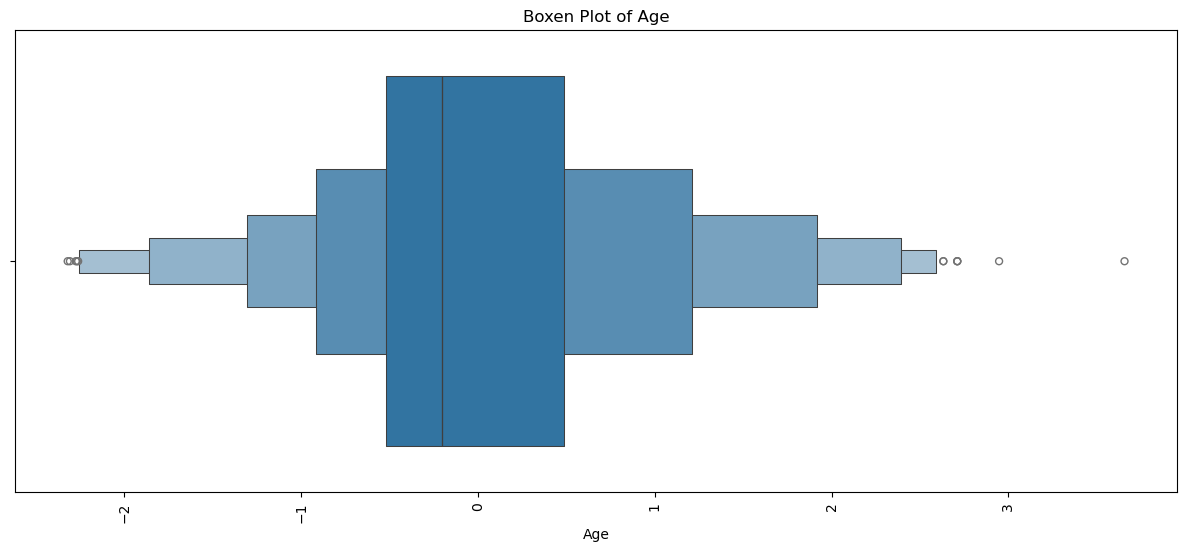

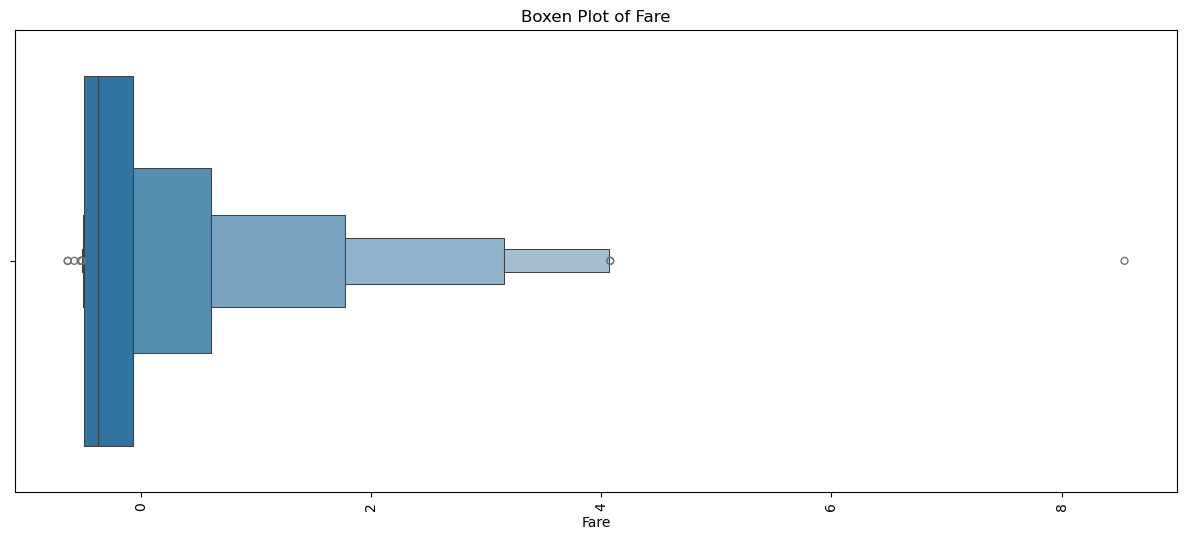

In [252]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxenplot(x=i, data=df)  # Removed 'palette' argument
    plt.xticks(rotation=90)
    plt.title(f"Boxen Plot of {i}")
    plt.show()


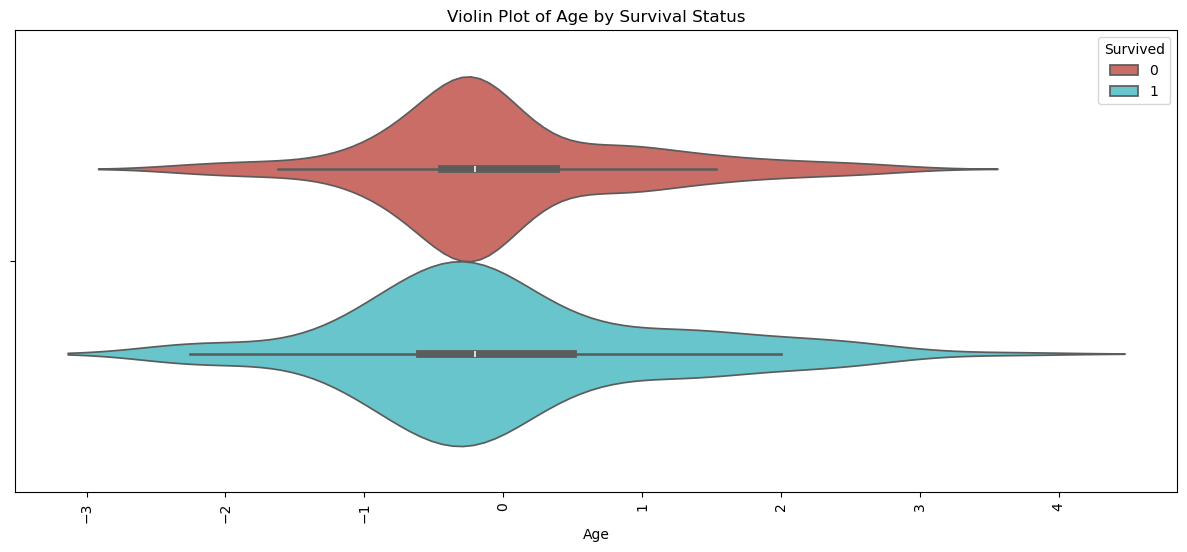

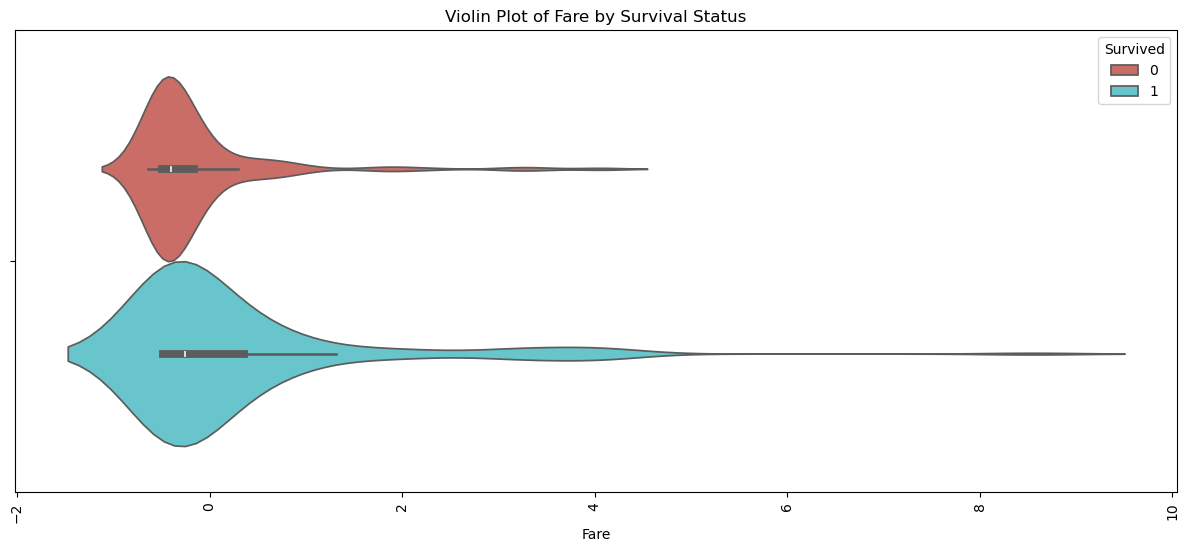

In [253]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.violinplot(x=i, data=df, hue='Survived', palette='hls')  # Use hue to apply the color palette
    plt.xticks(rotation=90)
    plt.title(f"Violin Plot of {i} by Survival Status")
    plt.show()


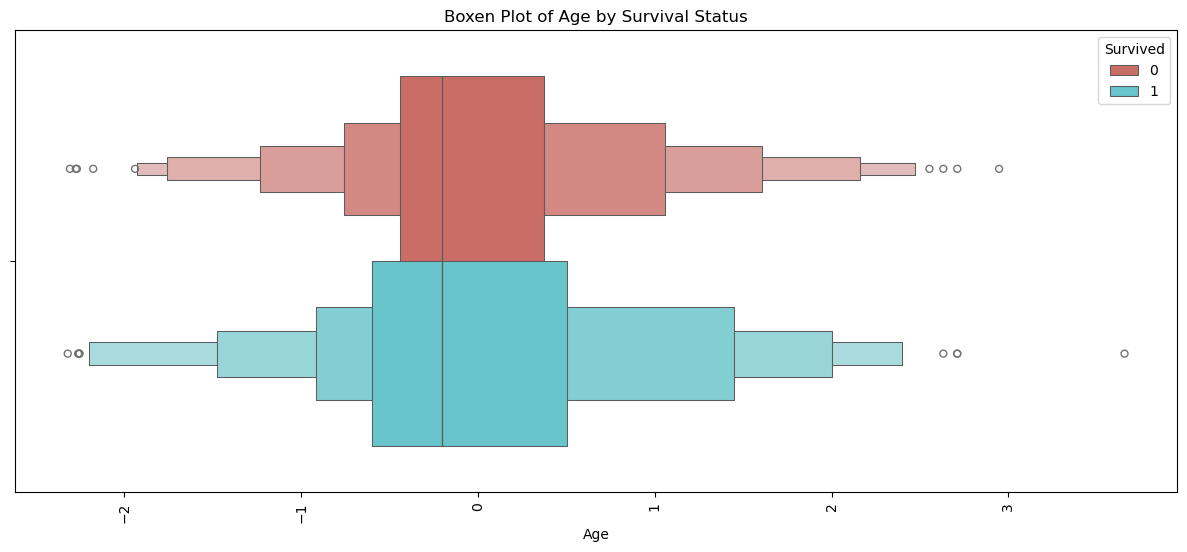

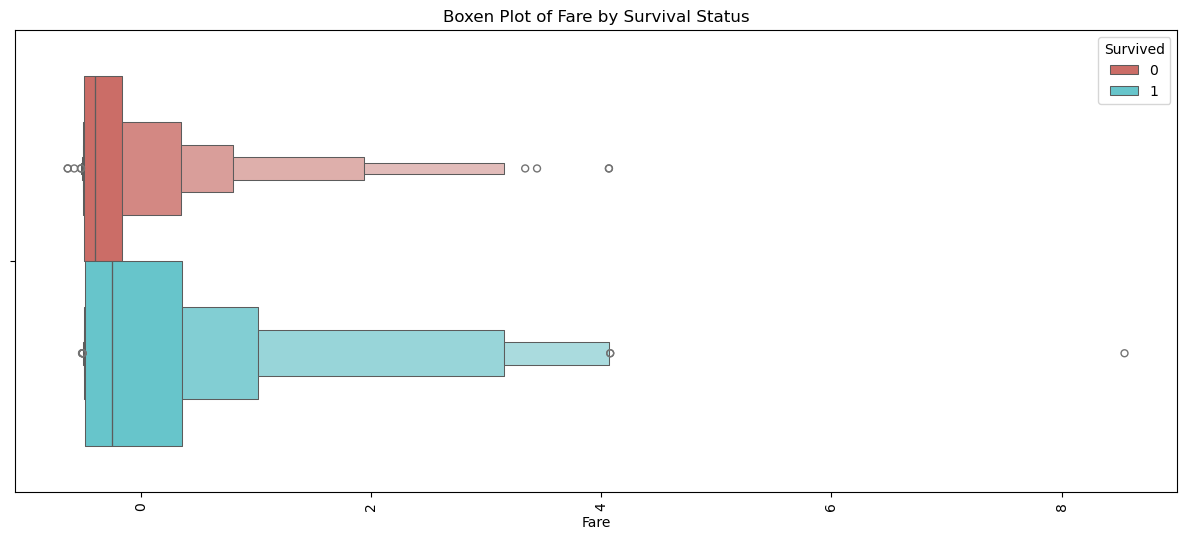

In [254]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxenplot(x=i, data=df, hue='Survived', palette='hls')  # Using 'hue' for coloring
    plt.xticks(rotation=90)
    plt.title(f"Boxen Plot of {i} by Survival Status")
    plt.show()


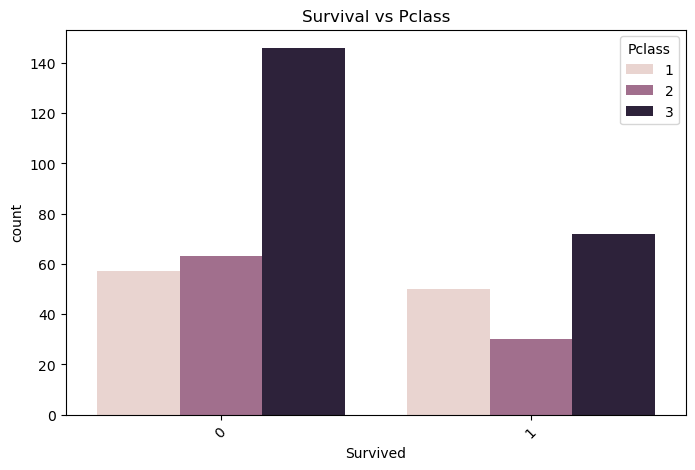

In [256]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title("Survival vs Pclass")
plt.xticks(rotation=45)
plt.show()


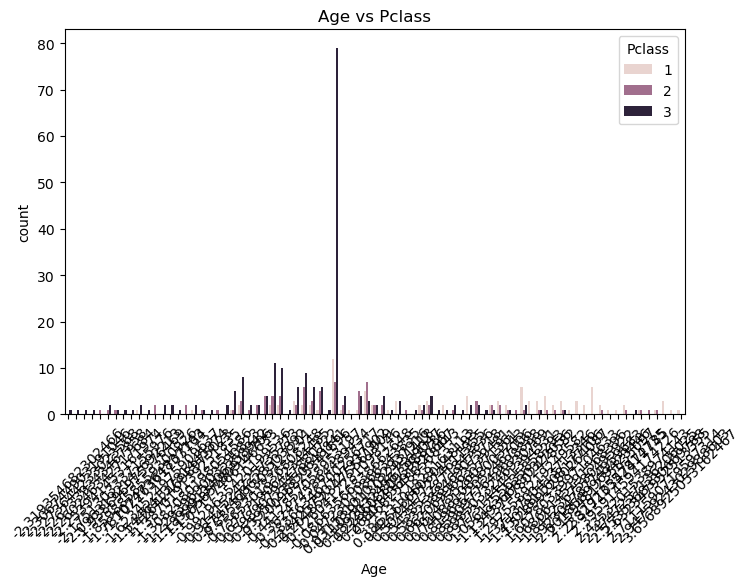

In [258]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Age', hue='Pclass', data=df)
plt.title("Age vs Pclass")
plt.xticks(rotation=45)
plt.show()

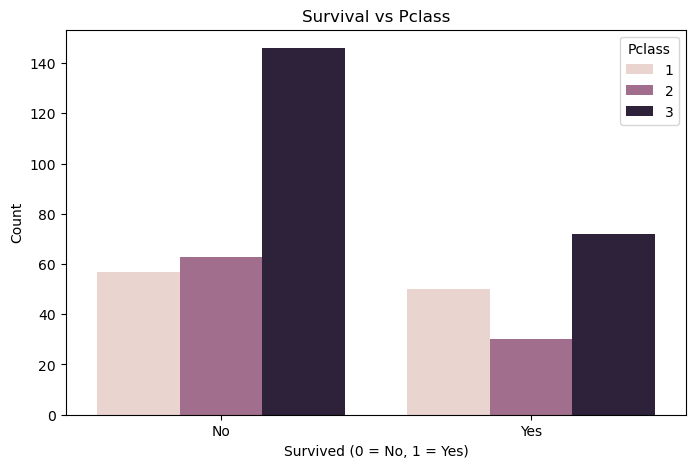

In [259]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title("Survival vs Pclass")
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])  # Only 0 and 1
plt.show()


In [346]:
categorical

['Sex', 'Embarked']

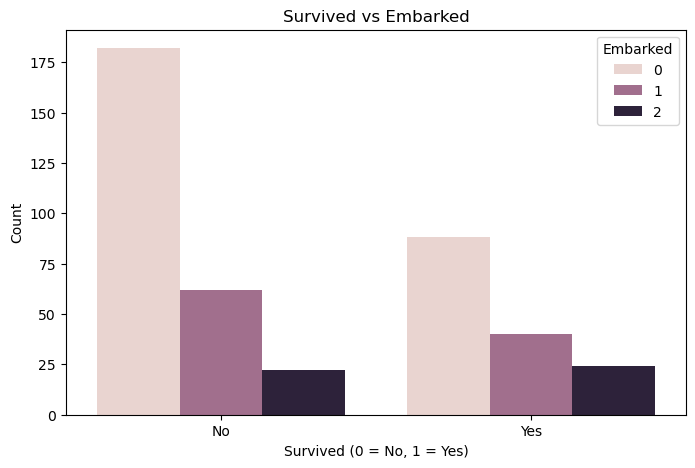

In [348]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', hue='Embarked', data=df)
plt.title("Survived vs Embarked")
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])  # Only 0 and 1
plt.show()

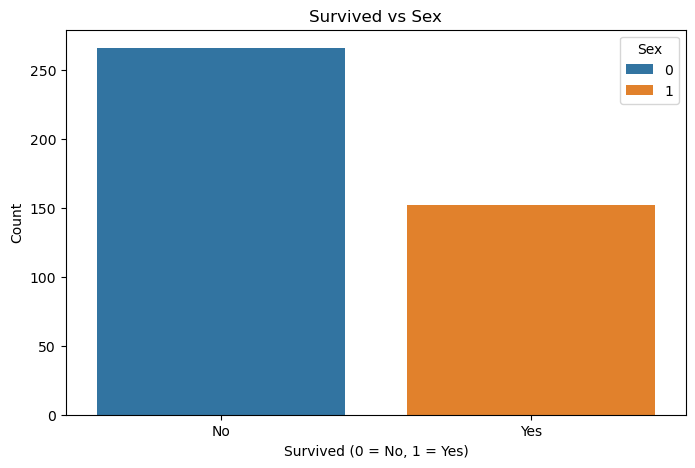

In [350]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survived vs Sex")
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])  # Only 0 and 1
plt.show()

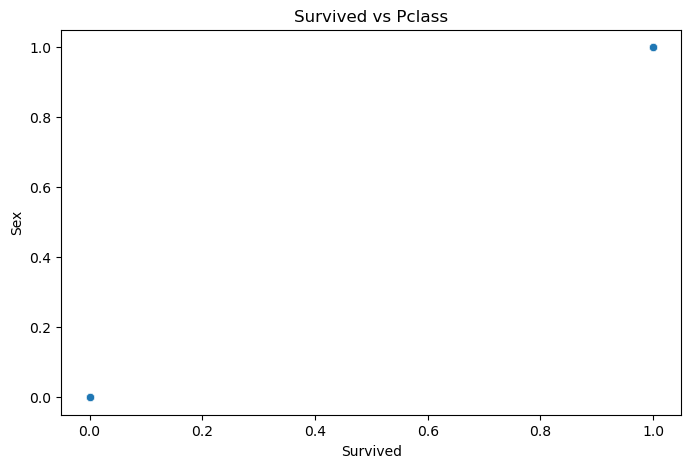

In [360]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Survived', y='Pclass', data=df)
plt.title("Survived vs Pclass")
plt.show()

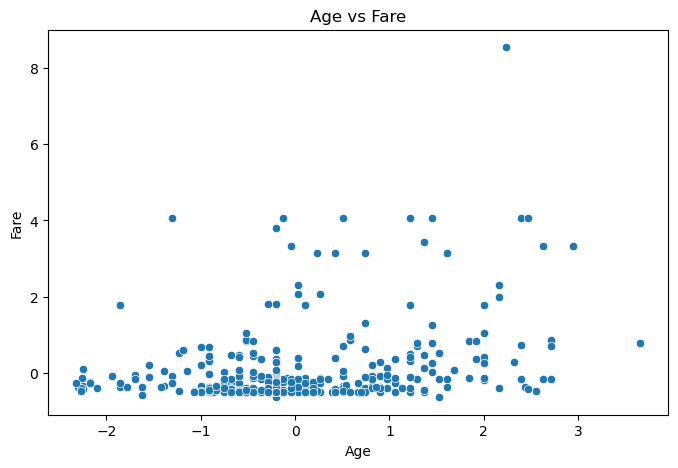

In [362]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Fare', data=df)
plt.title("Age vs Fare")
plt.show()

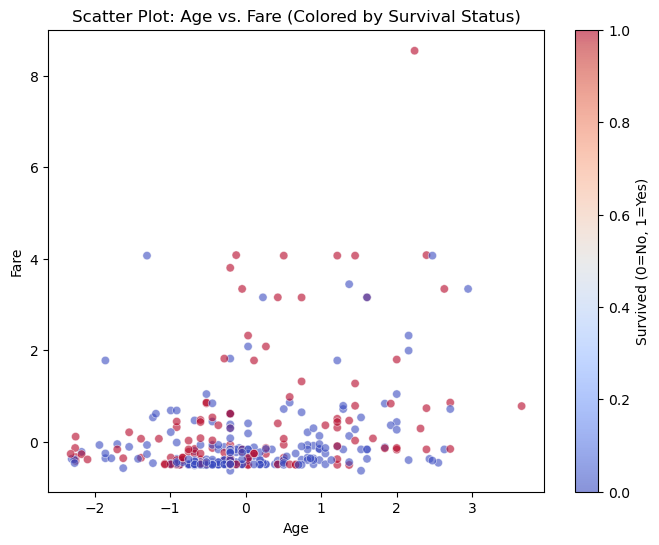

In [364]:
# Scatter plot with survival status (using color)
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Fare'], c=df['Survived'], cmap='coolwarm', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Scatter Plot: Age vs. Fare (Colored by Survival Status)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.colorbar(label='Survived (0=No, 1=Yes)')
plt.show()


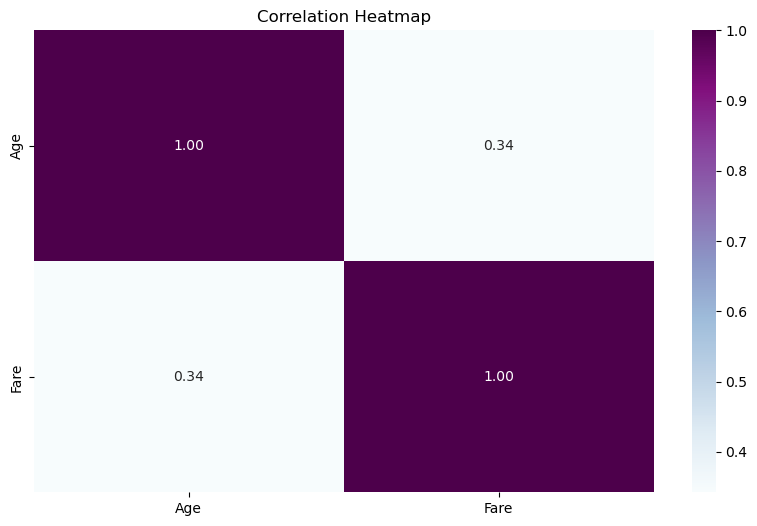

In [378]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[continuous].corr(), annot=True, cmap='BuPu', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

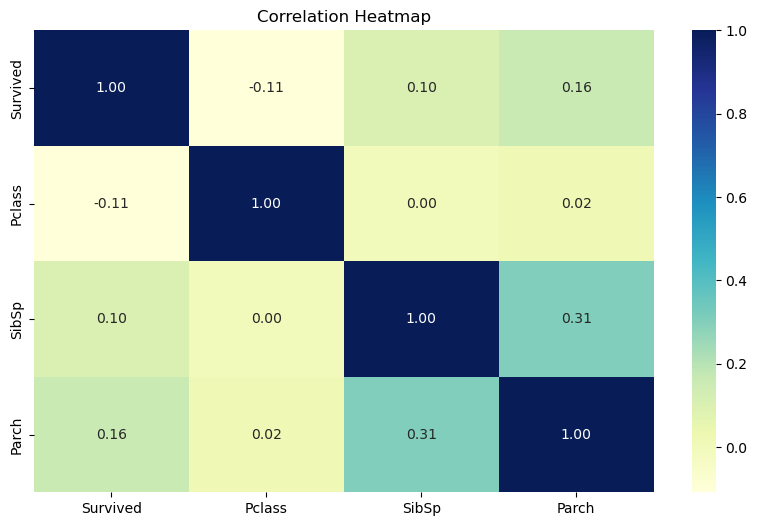

In [374]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[discrete].corr(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

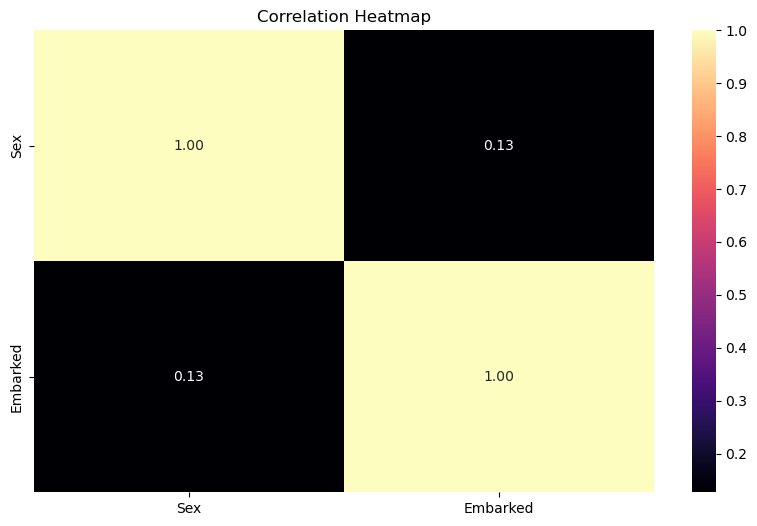

In [380]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[categorical].corr(), annot=True, cmap='magma', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [355]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [262]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [263]:
features = [ 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked']

target = 'Survived'

In [265]:
categorical_features = ['Sex','Pclass','Embarked']
numerical_features = ['Age','SibSp','Parch','Fare']

In [267]:
encoder = OneHotEncoder(drop='first', sparse_output=False)

In [269]:
if all(col in df.columns for col in categorical_features):
    # Fit and transform the categorical features
    encoded_categorical = encoder.fit_transform(df[categorical_features])

    # Convert the encoded array to a DataFrame
    encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))

In [270]:
encoded_categorical_df 

,Sex_1,Pclass_2,Pclass_3,Embarked_1,Embarked_2
0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
413,0.0,0.0,1.0,0.0,0.0
414,1.0,0.0,0.0,1.0,0.0
415,0.0,0.0,1.0,0.0,0.0
416,0.0,0.0,1.0,0.0,0.0


In [284]:
encoded_categorical_df.shape

(418, 5)

In [286]:
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(df[numerical_features])
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_features)

In [288]:
scaled_numerical_df.shape

(418, 4)

In [290]:
df1 = pd.concat([scaled_numerical_df, encoded_categorical_df], axis=1)

In [292]:
df1.shape

(418, 9)

In [294]:
df1

,Age,SibSp,Parch,Fare,Sex_1,Pclass_2,Pclass_3,Embarked_1,Embarked_2
0,0.386231,-0.499470,-0.400248,-0.497413,0.0,0.0,1.0,0.0,1.0
1,1.371370,0.616992,-0.400248,-0.512278,1.0,0.0,1.0,0.0,0.0
2,2.553537,-0.499470,-0.400248,-0.464100,0.0,1.0,0.0,0.0,1.0
3,-0.204852,-0.499470,-0.400248,-0.482475,0.0,0.0,1.0,0.0,0.0
4,-0.598908,0.616992,0.619896,-0.417492,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
413,-0.204852,-0.499470,-0.400248,-0.493455,0.0,0.0,1.0,0.0,0.0
414,0.740881,-0.499470,-0.400248,1.314435,1.0,0.0,0.0,1.0,0.0
415,0.701476,-0.499470,-0.400248,-0.507796,0.0,0.0,1.0,0.0,0.0
416,-0.204852,-0.499470,-0.400248,-0.493455,0.0,0.0,1.0,0.0,0.0


In [296]:
df1.isnull().sum()

Age           0
SibSp         0
Parch         0
Fare          0
Sex_1         0
Pclass_2      0
Pclass_3      0
Embarked_1    0
Embarked_2    0
dtype: int64

In [298]:
discrete

['Survived', 'Pclass', 'SibSp', 'Parch']

In [300]:
df2 = df[['Survived', 'Pclass', 'SibSp', 'Parch']]

In [302]:
df2

,Survived,Pclass,SibSp,Parch
0,0,3,0,0
1,1,3,1,0
2,0,2,0,0
3,0,3,0,0
4,1,3,1,1
...,...,...,...,...
413,0,3,0,0
414,1,1,0,0
415,0,3,0,0
416,0,3,0,0


In [304]:
df2 = df2.reset_index()
df2

,index,Survived,Pclass,SibSp,Parch
0,0,0,3,0,0
1,1,1,3,1,0
2,2,0,2,0,0
3,3,0,3,0,0
4,4,1,3,1,1
...,...,...,...,...,...
413,413,0,3,0,0
414,414,1,1,0,0
415,415,0,3,0,0
416,416,0,3,0,0


In [306]:
df_processed = pd.concat([df1, df2], axis=1)

In [308]:
df_processed

,Age,SibSp,Parch,Fare,Sex_1,Pclass_2,Pclass_3,Embarked_1,Embarked_2,index,Survived,Pclass,SibSp,Parch
0,0.386231,-0.499470,-0.400248,-0.497413,0.0,0.0,1.0,0.0,1.0,0,0,3,0,0
1,1.371370,0.616992,-0.400248,-0.512278,1.0,0.0,1.0,0.0,0.0,1,1,3,1,0
2,2.553537,-0.499470,-0.400248,-0.464100,0.0,1.0,0.0,0.0,1.0,2,0,2,0,0
3,-0.204852,-0.499470,-0.400248,-0.482475,0.0,0.0,1.0,0.0,0.0,3,0,3,0,0
4,-0.598908,0.616992,0.619896,-0.417492,1.0,0.0,1.0,0.0,0.0,4,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,-0.204852,-0.499470,-0.400248,-0.493455,0.0,0.0,1.0,0.0,0.0,413,0,3,0,0
414,0.740881,-0.499470,-0.400248,1.314435,1.0,0.0,0.0,1.0,0.0,414,1,1,0,0
415,0.701476,-0.499470,-0.400248,-0.507796,0.0,0.0,1.0,0.0,0.0,415,0,3,0,0
416,-0.204852,-0.499470,-0.400248,-0.493455,0.0,0.0,1.0,0.0,0.0,416,0,3,0,0


In [310]:
X = df_processed.drop('Survived', axis = 1)
y = df_processed['Survived']

In [312]:
df_processed['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

In [314]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [316]:
y_train = y_train.astype(int)

In [318]:
from imblearn.over_sampling import SMOTE

In [320]:
smote = SMOTE(random_state=42) 

In [326]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [328]:
y_test = y_test.astype(int)

In [330]:
y_pred = log_reg.predict(X_test)

In [332]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



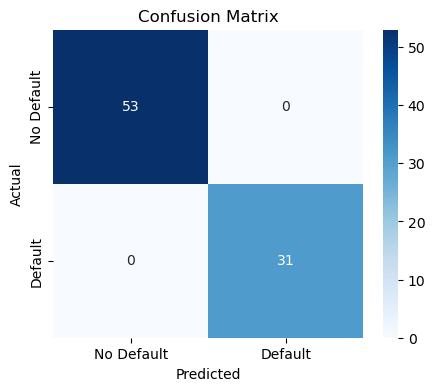

In [334]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [336]:
from sklearn.tree import DecisionTreeClassifier

In [338]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [340]:
y_pred = dt_classifier.predict(X_test)

In [342]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



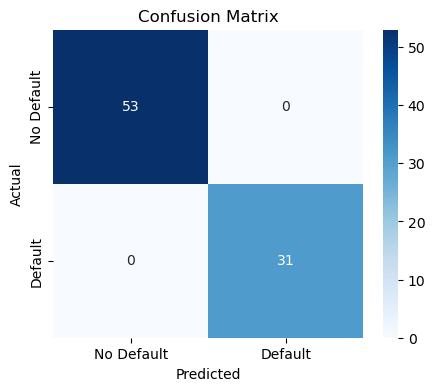

In [344]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()